In [2]:
import numpy as np
from pylab import *
from math import *
import matplotlib.pyplot as plt
from rich.progress import Progress
from IPython.display import clear_output
import time

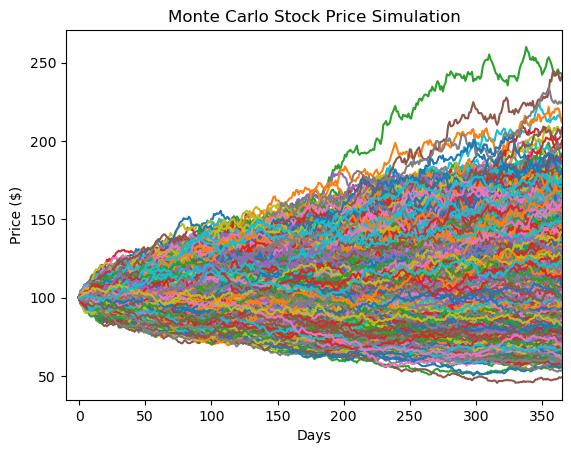

The average return is: $ 109.2570636099268
The minimum return is: $ 49.195153831628176
The maxium return is: $ 242.98566855792484
The standard deviation of the return is: $ 21.979228472359182


In [3]:
S0 = 100            # Stock price at the beginning of the simulation
mu = 0.07           # The Expected annual return (i.e. mu = 0.07 means 7% return)
sigma = 0.2         # The standard deviation (i.e. Volatility)
T = 1               # Time in years
dt = 1/365          # Daily steps
N = int(T/dt)       # Number of steps taken
simulations = 10000    # Total number of simulated paths plotted
final_prices = []   # Saving the final price value after give time

with Progress() as p:
    t = p.add_task("Processing...", total=100)
    for i in range(simulations):
        prices = [S0]
        for _ in range(N):
                shock = np.random.normal(loc=(mu*dt), scale=(sigma*np.sqrt(dt)))  # Calculating the random increase/decrease percentage
                prices.append(prices[-1] * np.exp(shock))                         # Colculating resultant stock price from shock
        final_prices.append(prices[-1])                                           # Saving final price, -1 denotes last value in that array
        plt.plot(prices)
        p.update(t, advance=(100/simulations))
p.stop()
clear_output(wait=True)

plt.title("Monte Carlo Stock Price Simulation")
plt.xlabel("Days")
plt.ylabel("Price ($)")
plt.xlim(-10,(T*365))
plt.show()

final_prices.sort()                                                               # Sorting final prices in ascending order

def mean(array_monte):                                                            # Defining a mean calculation of the Monte Carlo
    total = sum(array_monte)
    mean = (total)/len(array_monte)
    return mean

mean_final_prices = mean(final_prices)
min_final_prices = final_prices[0]                                                # Finding minimum value of final prices
max_final_prices = final_prices[-1]                                               # Finding maxium value of final prices
std_final_prices = std(final_prices)                                              # Finding the standard deviation of the final prices
median_final_prices = median(final_prices)

print("The average return is: $",mean_final_prices)
print("The minimum return is: $",min_final_prices)                               
print("The maxium return is: $",max_final_prices)                                
print("The standard deviation of the return is: $",std_final_prices)

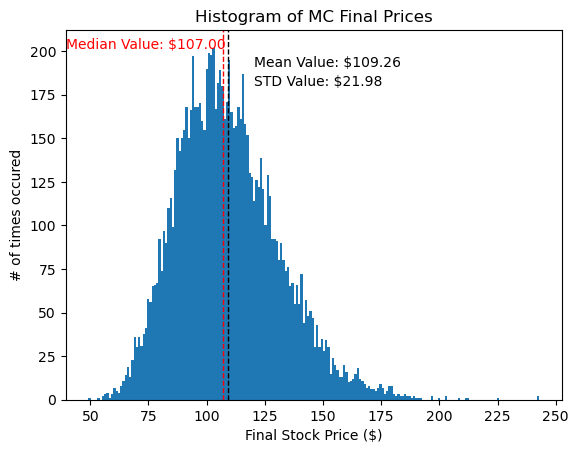

In [4]:
MC_hist_bins = round(1 + log2(simulations))                                             # Sturges Formula for bins
plt.hist(final_prices, bins=200)                                                        # bins = Number of bins
plt.title("Histogram of MC Final Prices")
plt.xlabel("Final Stock Price ($)")
plt.ylabel("# of times occured")
plt.axvline(mean_final_prices, color="black", linestyle='--', linewidth=1)
plt.axvline(median_final_prices, color="red", linestyle='--', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(mean_final_prices*1.1, max_ylim*0.9, 'Mean Value: ${:.2f}'.format(mean_final_prices))
plt.text(mean_final_prices*1.1, max_ylim*0.85, 'STD Value: ${:.2f}'.format(std_final_prices))
plt.text(median_final_prices*0.37, max_ylim*0.95, 'Median Value: ${:.2f}'.format(median_final_prices), color="red")

plt.show()

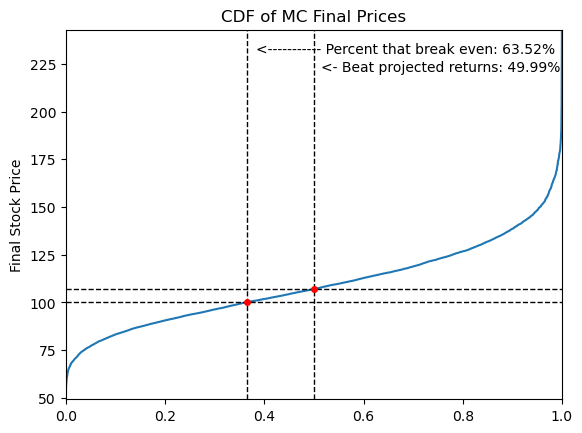

In [5]:
# CDF on the Monte Carlo Simulation

CDF_range = linspace(0,1,simulations)
plt.plot(CDF_range,final_prices)
plt.title("CDF of MC Final Prices")
plt.ylabel("Final Stock Price")
plt.xlim(0,1)
plt.ylim(min_final_prices,max_final_prices)

# Intersectional point of Horizonal Line @ S0 and CDF
even_dist = S0                                                                                 # even_dist is the distance from S0
loc_break_even = 0                                                                             # loc. of break even position in array
for i in range(simulations):
    temp = abs(S0 - final_prices[i])
    if even_dist > temp and final_prices[i] > S0:
        even_dist  = temp
        loc_break_even = i
percent_in_profit = ((simulations - (loc_break_even + 1))/simulations)*100

# Lines for Break Even Point
plt.axhline(S0, color="black", linestyle='--', linewidth=1)                                     # Horizontal line showing S0
min_ylim, max_ylim = plt.ylim()
plt.axvline(CDF_range[loc_break_even], color="black", linestyle='--', linewidth=1)              # Vertical line showing S0 intersect CDF
plt.plot(CDF_range[loc_break_even], S0, linestyle='', marker='o', markersize=4, color="red")  
plt.text((CDF_range[loc_break_even]*1.05), max_ylim*0.95 , '<----------- Percent that break even: {:.2f}%'.format(percent_in_profit))


# Intersectional point of Horiziontal Line @ predicted value and CDF
prob_final_price = S0*((1+mu)**T)
prob_dist = prob_final_price                                                                    # even_dist is the distance from S0
loc_beat_prob = 0                                                                               # loc. of break even position in array
for i in range(simulations):
    temp = abs(prob_final_price - final_prices[i])
    if prob_dist > temp and final_prices[i] > prob_final_price:
        prob_dist  = temp
        loc_beat_prob = i
percent_beat_prob = ((simulations - (loc_beat_prob + 1))/simulations)*100


plt.axhline(prob_final_price, color="black", linestyle='--', linewidth=1)                       # Horizontal line S0*annual return
plt.axvline(CDF_range[loc_beat_prob], color="black", linestyle='--', linewidth=1)               # Vertical line showing S0*annual in CDF
plt.plot(CDF_range[loc_beat_prob], prob_final_price, linestyle='', marker='o', markersize=4, color="red")  
plt.text((CDF_range[loc_beat_prob]*1.03), max_ylim*0.91 , '<- Beat projected returns: {:.2f}%'.format(percent_beat_prob))
plt.show()